# Library lmfit
- It seems like the library curve_fit from scipy is not working. Found [this article](https://stackoverflow.com/questions/50371428/scipy-curve-fit-raises-optimizewarning-covariance-of-the-parameters-could-not) which is saying to use a lmfit. 
- In this notebook I will try to do that

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import StepModel, ExponentialModel, Model
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_zero_model():
    xdata = np.linspace(-100, 200, 30)
    ydata = np.zeros(301)

    model = StepModel(form='linear', prefix='step_')
    zero_model =model.fit(ydata, x=xdata)

    return zero_model

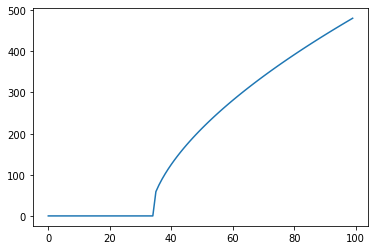

In [3]:
xdata = np.linspace(-100, 200, 100)
ydata = np.zeros(100)
ydata[35:100] = 20*xdata[35:100]**0.6
ydata = ydata + np.random.normal(0,0,100)
plt.plot(ydata)

In [39]:
max(xdata)

200.0

In [40]:
ydata

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  58.95757731,
        75.1959386 ,  89.36297665, 102.16535169, 113.97572986,
       125.02027669, 135.44894414, 145.36743835, 154.85371608,
       163.96729906, 172.75490194, 181.25401818, 189.49530454,
       197.5042235 , 205.30220854, 212.90751184, 220.33583453,
       227.60080423, 234.71434285, 241.68695416, 248.52795155,
       255.24564057, 261.84746681, 268.34013686, 274.7297181 ,
       281.02172173, 287.22117236, 293.33266672, 299.36

In [25]:
pw_model = Model(piecewise_linear)
fitted_model = pw_model.fit(ydata, x = xdata)

fitted_model.plot()

ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [21]:
def pw_linear(x,x0,y0,k1,k2): 
    if x<x0: 
        return (x-x0)*k1+y0
    else: 
        return (x-x0)*k2_y0

In [23]:
pw_linear_v = np.vectorize(pw_linear)

In [5]:
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x: k1 * x + y0 - k1 * x0, lambda x: k2 * x + y0 - k2 * x0])


In [76]:
pw_model = Model(piecewise_linear)

In [80]:
params = pw_model.make_params(x0=0, y0=0, k1=0, k2=20)
result = pw_model.fit(utilities, params, x=spark_prices) 

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

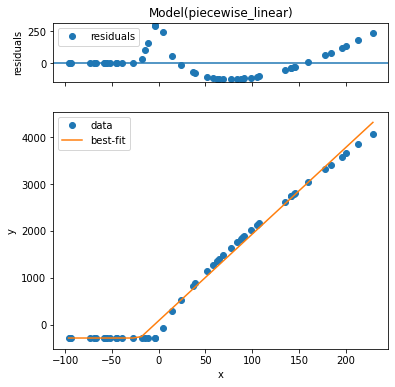

In [83]:
result.plot()

In [44]:
spark_prices = [36.35220398990176, 89.98482239433874, 146.14866925335906, -73.8559862365699, 160.14420624907902, -57.65810297566061, 69.08052052522773, -4.23425618441687, 98.50112774509203, 178.35005457778897, -67.19126847923756, 141.95178064460342, 91.7137634435694, 76.91943137908895, 87.84113469864819, 62.91725172075331, -58.074912963414334, 14.448989023490086, 213.5187478402679, -39.196199743894965, -96.32665520404177, 23.74672394071402, -11.365992873010239, 195.83903956957806, 184.17500066157274, -51.522640065808105, 88.95285647249419, 4.895878156001903, 64.35197305322754, -3.8678119854143205, 52.00941934255592, 200.8599786166914, -14.29176511217019, -55.060877246215, 145.0646338262003, -45.42919839457131, 83.74604200116309, -18.278154773237397, -95.20755160671374, 39.33321548506107, -44.962537548887894, 105.47722074953818, -69.55642115485159, 57.710573497099965, 134.76544760689498, -93.88062944860835, 141.96073206238745, -27.327318053400436, 107.31322255408115, 229.15002118399605, 85.48996757362733, -82.08538023856454, 217.05055317842823, 43.5386745100125, 34.78513646976281, -25.080852633441012, 7.900849886205592, 5.914227339899597, 162.07969931910617, -14.77953795945816, 73.42824815226301, 164.20670450582438, 96.08999429007159, -30.143953507834667, 216.54783657318683, 3.1178750418801897, -23.59998074440628, 41.60520202428461, 118.11728273593064, -86.01307354055419]
utilities = [826.48, 1865.7, 2810.31, -283.2, 3032.66, -283.2, 1483.88, -283.2, 2015.58, 3315.98, -283.2, 2742.78, 1896.37, 1629.65, 1827.51, 1366.71, -283.2, 297.12, 3847.05, -283.2, -283.2, 537.99, -283.2, 3582.54, 3405.33, -283.2, 1847.34, -69.1, 1394.21, -283.2, 1152.82, 3658.14, -283.2, -283.2, 2792.9, -283.2, 1753.98, -283.2, -283.2, 890.81, -283.2, 2136.29, -283.2, 1265.74, 2626.16, -283.2, 2742.92, -283.2, 2167.78, 4077.18, 1785.39, -283.2, 3899.34, 979.64, 792.17, -283.2, 90.08, -8.22, 3063.09, -283.2, 1565.15, 3096.44, 1973.44, -283.2, 3891.91, -153.72, -283.2, 939.06, 2350.83, -283.2]

In [45]:
spark_prices = spark_prices[0:50]
utilities = utilities[0:50]

In [46]:
df = pd.DataFrame({"sparks": spark_prices, "utilities": utilities})
df = df.sort_values(by = "sparks")
df = df.round(2)
spark_prices = list(df["sparks"])
utilities = list(df["utilities"])

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

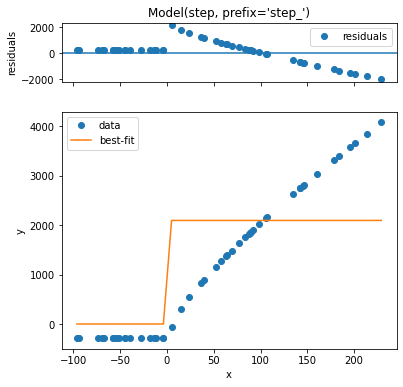

In [47]:
model = StepModel(form='linear', prefix='step_')

fitted_model = model.fit(utilities, x=spark_prices)

# print results
# plot data and best-fit
fitted_model.plot()

In [64]:
lmodel = Model(two_lines)


In [74]:
params = lmodel.make_params(offset1=0, slope1=0, offset2=0, slope2=20,
                            cutoff=0, width=0)
result = lmodel.fit(utilities, params, x=spark_prices) 

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

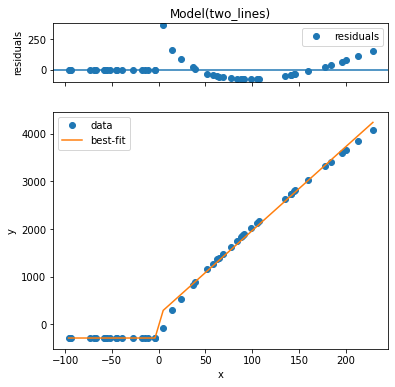

In [75]:


result.plot()

In [49]:
def two_lines(x, offset1, slope1, offset2, slope2, cutoff, width=1.0):
    """two line segments, joined at a cutoff point by a logistic step"""
    # step = 1 - 1./(1. + np.exp((x - cutoff)/max(1.-5, width)))
    step = logistic(x, center=cutoff, sigma=width)
    return (offset1 + slope1*x)*(1-step)  + (offset2 + slope2*x)*(step)

lmodel = Model(two_lines)

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from lmfit import Model
from lmfit.lineshapes import logistic

In [41]:
fitted_model = lmodel.fit(ydata, x = xdata)


ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from lmfit import Model
from lmfit.lineshapes import logistic

# build some fake data comprised of two line segments
x = np.linspace(0, 50, 101)
y = 37.0  - 0.62*x
y[62:] = y[62] - 5.41*(x[62:] - x[62])
y = y + np.random.normal(size=len(y), scale=8)

def two_lines(x, offset1, slope1, offset2, slope2, cutoff, width=1.0):
    """two line segments, joined at a cutoff point by a logistic step"""
    # step = 1 - 1./(1. + np.exp((x - cutoff)/max(1.-5, width)))
    step = logistic(x, center=cutoff, sigma=width)
    return (offset1 + slope1*x)*(1-step)  + (offset2 + slope2*x)*(step)

lmodel = Model(two_lines)
params = lmodel.make_params(offset1=1.8, slope1=0, offset2=10, slope2=-4,
                            cutoff=25.0, width=1.0)
# the width could be varied, or just set to ~1 `x` interval or so.
# here, we fix it at 'half a step'
params['width'].value = (x[1] - x[0]) /2.0
params['width'].vary = False

[[Model]]
    Model(two_lines)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 73
    # data points      = 101
    # variables        = 5
    chi-square         = 6896.45052
    reduced chi-square = 71.8380263
    Akaike info crit   = 436.587804
    Bayesian info crit = 449.663407
[[Variables]]
    offset1:  37.6293743 +/- 2.25971111 (6.01%) (init = 1.8)
    slope1:  -0.71622871 +/- 0.14493904 (20.24%) (init = 0)
    offset2:  179.127668 +/- 8.09203342 (4.52%) (init = 10)
    slope2:  -5.30505722 +/- 0.20319484 (3.83%) (init = -4)
    cutoff:   27.8201409 +/- 0.56760320 (2.04%) (init = 25)
    width:    0.25 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(offset2, slope2) = -0.987
    C(offset1, slope1) = -0.862
    C(offset2, cutoff) =  0.224
    C(slope1, cutoff)  =  0.216
    C(slope2, cutoff)  = -0.208
    C(offset1, cutoff) = -0.125


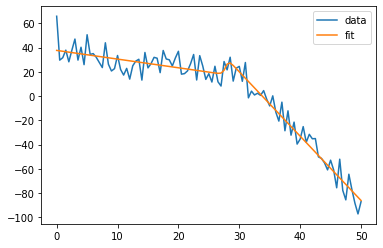

In [71]:
# do the fit, print fit report   
result = lmodel.fit(y, params, x=x)  
print(result.fit_report())

# plot the results
plt.plot(x, y, label='data')
plt.plot(x, result.best_fit, label='fit')
plt.legend()
plt.show()